Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load the Data

In [21]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')


Data Exploration and Cleaning

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

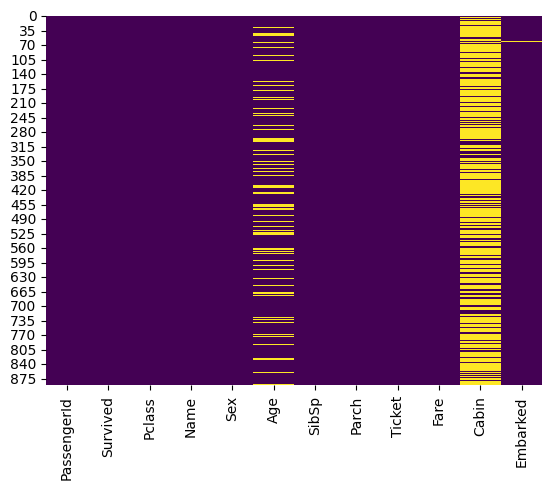

In [22]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


 Data Visualization

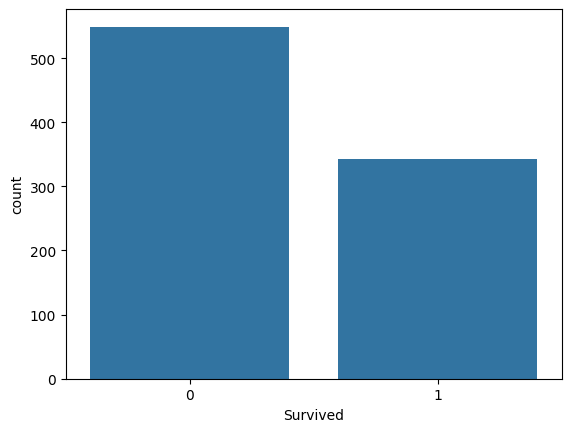

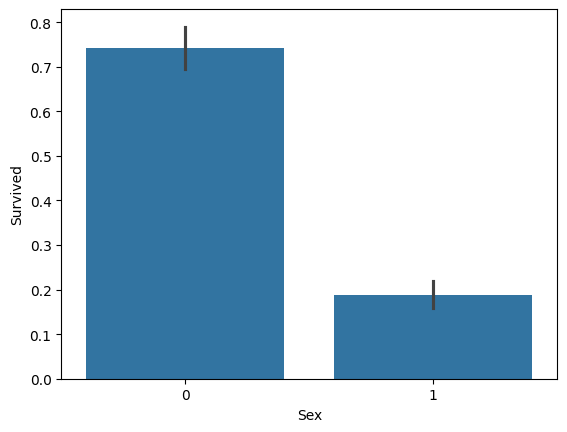

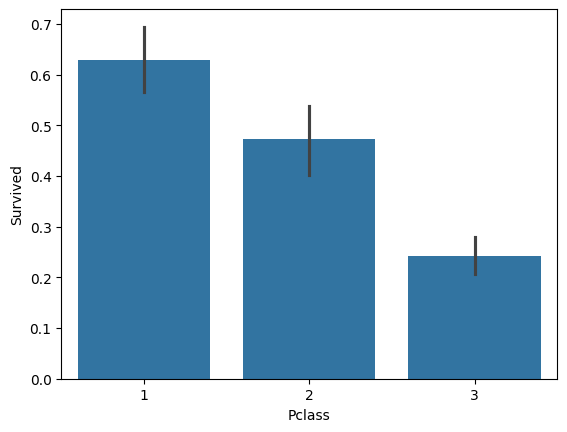

In [14]:
# Survival count plot
sns.countplot(x='Survived', data=df)
plt.show()

# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()


Data Pre-processing

In [23]:
# Fill missing values in 'Age' with the median age
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with the median fare
df['Fare'] = imputer.fit_transform(df[['Fare']])

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


Split the Data

In [24]:
# Define features and target variable
X = df.drop(columns='Survived')
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build, Train, and Evaluate the Models**

**Random Forest**

In [25]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.8156
Confusion Matrix:
[[91 14]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



**Logistic Regression**

In [26]:
# Initialize the model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print the results
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')
print('Confusion Matrix:')
print(conf_matrix_log_reg)
print('Classification Report:')
print(class_report_log_reg)


Logistic Regression Accuracy: 0.8101
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**SVM**

In [27]:
# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f'SVM Accuracy: {accuracy_svm:.4f}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)


SVM Accuracy: 0.8156
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



**Gradient Boosting Classifier**

In [28]:
# Initialize the model
gbc_model = GradientBoostingClassifier()

# Train the model
gbc_model.fit(X_train, y_train)

# Make predictions
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
class_report_gbc = classification_report(y_test, y_pred_gbc)

# Print the results
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gbc:.4f}')
print('Confusion Matrix:')
print(conf_matrix_gbc)
print('Classification Report:')
print(class_report_gbc)


Gradient Boosting Classifier Accuracy: 0.8101
Confusion Matrix:
[[93 12]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Plot confusion matrices

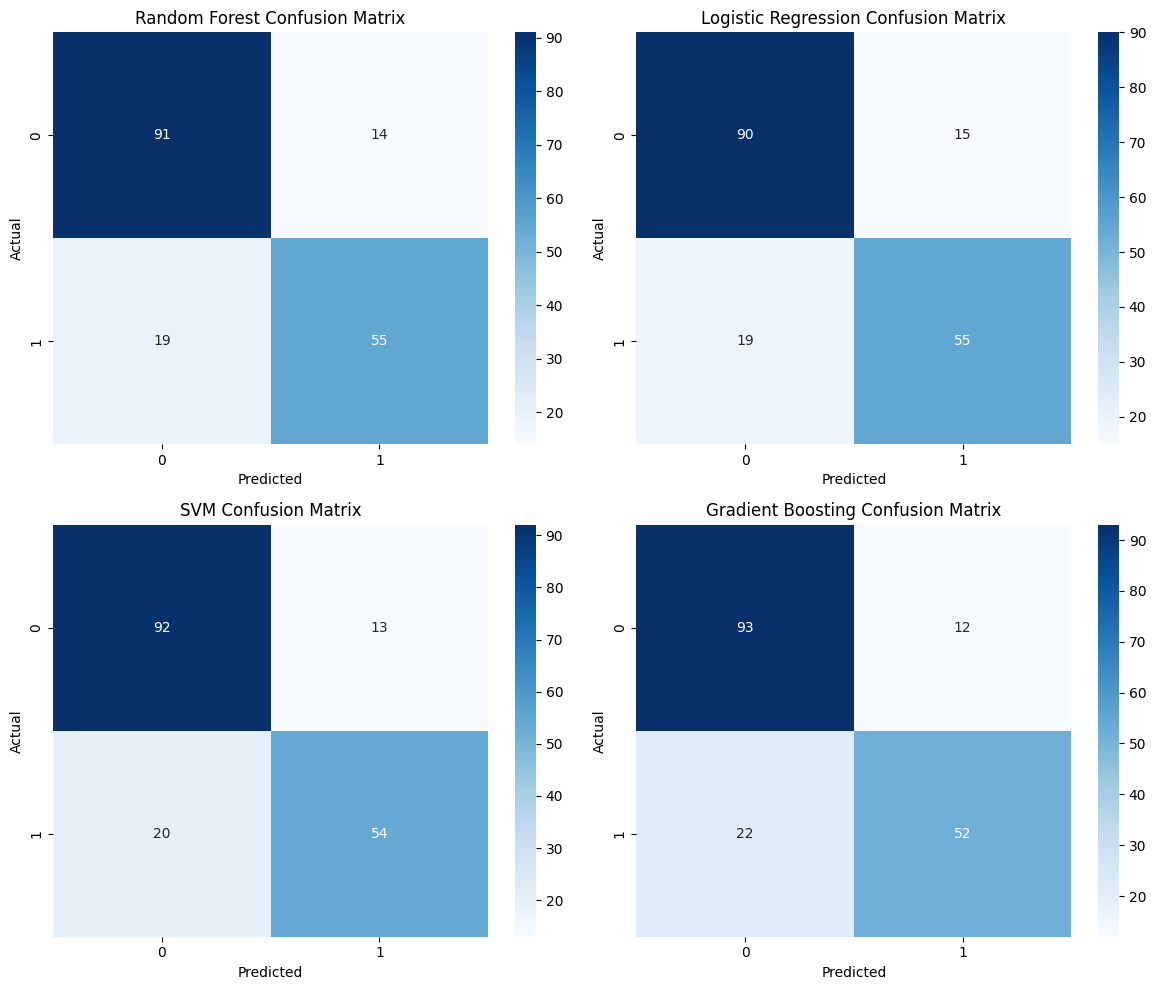

In [29]:
# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

models = {
    'Random Forest': conf_matrix_rf,
    'Logistic Regression': conf_matrix_log_reg,
    'SVM': conf_matrix_svm,
    'Gradient Boosting': conf_matrix_gbc
}

for ax, (name, matrix) in zip(axes, models.items()):
    sns.heatmap(matrix, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


Print accuracies

In [30]:
# Print Accuracies of all models
accuracies = {
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_log_reg,
    'SVM': accuracy_svm,
    'Gradient Boosting': accuracy_gbc
}

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


Model Accuracies:
Random Forest: 0.8156
Logistic Regression: 0.8101
SVM: 0.8156
Gradient Boosting: 0.8101


Tuning


In [36]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Train and evaluate the model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}
0.8300305328474342
Best Model Accuracy: 0.8100558659217877
Best Model Confusion Matrix:
[[95 10]
 [24 50]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Smote

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel



# Apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize feature selector
selector = SelectFromModel(best_rf_model)

# Fit selector to training data
selector.fit(X_train_resampled, y_train_resampled)

# Transform the data
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# Retrain the model on the selected features
best_rf_model.fit(X_train_selected, y_train_resampled)

# Make predictions
y_pred_rf_selected = best_rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
conf_matrix_rf_selected = confusion_matrix(y_test, y_pred_rf_selected)
class_report_rf_selected = classification_report(y_test, y_pred_rf_selected)

# Print the results
print(f'Selected Features Random Forest Accuracy: {accuracy_rf_selected:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf_selected)
print('Classification Report:')
print(class_report_rf_selected)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Selected Features Random Forest Accuracy: 0.7933
Confusion Matrix:
[[86 19]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



Cross validation

In [40]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the selected features
cv_scores_selected = cross_val_score(best_rf_model, X_train_selected, y_train_resampled, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores on Selected Features:")
print(cv_scores_selected)
print("Mean CV Accuracy on Selected Features:", cv_scores_selected.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-Validation Scores on Selected Features:
[0.76966292 0.78089888 0.78089888 0.77966102 0.7740113 ]
Mean CV Accuracy on Selected Features: 0.7770265981082968
